[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/CompOmics/D012554A_2025/blob/main/notebooks/day_1/answers/1.1b_Exercises_Linear_regression_answers.ipynb)

# 1.1 Exercises — Linear Regression (Answers)

This notebook contains the solutions to the exercises in the companion exercise notebook. The exercises use the Auto MPG dataset to practice the linear regression techniques taught in the lecture.

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
sns.set_context("notebook", font_scale=1.2)
sns.set_style("whitegrid")

---
## Exercise 1 — Load and Explore the Data

In [2]:
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv"

dataset = pd.read_csv(url)

# Print first 10 rows
print(dataset.head(10))
print()

# Shape
print(f"Shape: {dataset.shape}")
print(f"  -> {dataset.shape[0]} cars, {dataset.shape[1]} columns")
print()

# Summary statistics
print(dataset.describe())
print(f"\nAverage mpg: {dataset['mpg'].mean():.2f}")

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   
5  15.0          8         429.0       198.0    4341          10.0   
6  14.0          8         454.0       220.0    4354           9.0   
7  14.0          8         440.0       215.0    4312           8.5   
8  14.0          8         455.0       225.0    4425          10.0   
9  15.0          8         390.0       190.0    3850           8.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa         

In [3]:
dataset = dataset.drop(columns=['name']).dropna()

# Convert origin from string to numeric (usa=1, europe=2, japan=3)
origin_map = {'usa': 1, 'europe': 2, 'japan': 3}
dataset['origin'] = dataset['origin'].map(origin_map)

print(f"Clean dataset shape: {dataset.shape}")
dataset.head()


Clean dataset shape: (392, 8)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


---
## Exercise 2 — Visualize Relationships

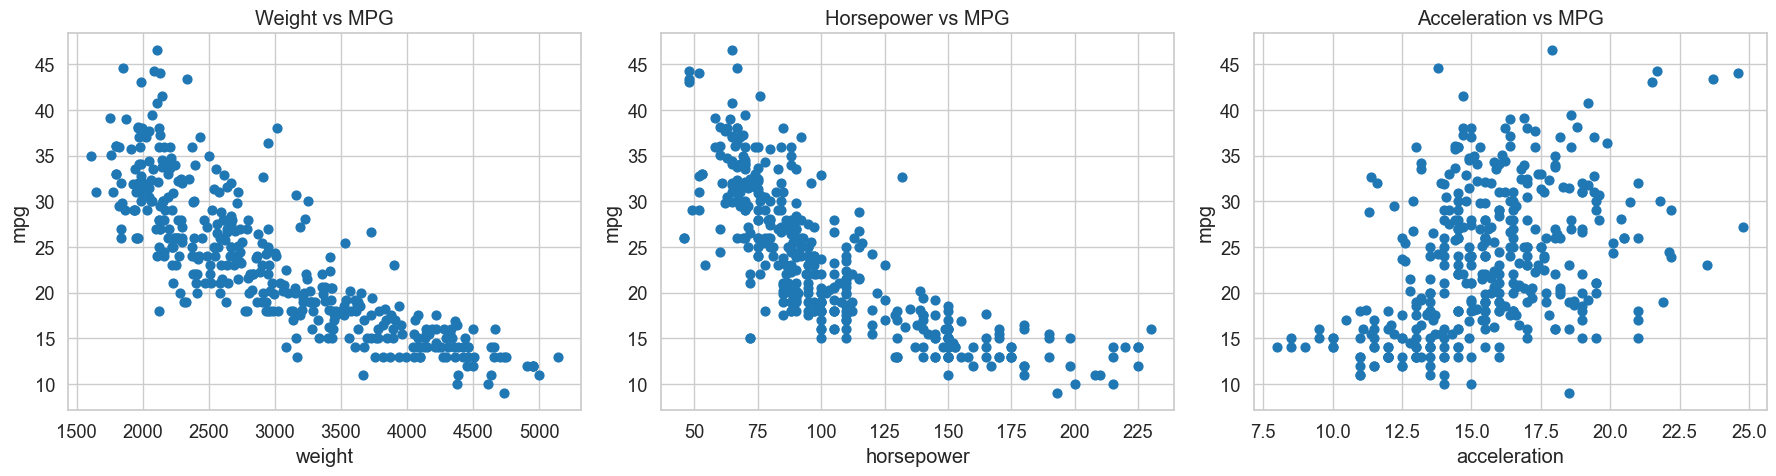

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].scatter(dataset['weight'], dataset['mpg'], s=40)
axes[0].set_xlabel('weight')
axes[0].set_ylabel('mpg')
axes[0].set_title('Weight vs MPG')

axes[1].scatter(dataset['horsepower'], dataset['mpg'], s=40)
axes[1].set_xlabel('horsepower')
axes[1].set_ylabel('mpg')
axes[1].set_title('Horsepower vs MPG')

axes[2].scatter(dataset['acceleration'], dataset['mpg'], s=40)
axes[2].set_xlabel('acceleration')
axes[2].set_ylabel('mpg')
axes[2].set_title('Acceleration vs MPG')

plt.tight_layout()
plt.show()

Answer: Weight has the strongest linear relationship with mpg. It is a negative relationship — heavier cars tend to have lower fuel efficiency. Horsepower also shows a clear negative trend, but the scatter is wider. Acceleration shows a weak positive trend with much more spread.

---
## Exercise 3 — Standardize the Data

Standardized weight — mean: -0.000000, std: 1.001278
Standardized mpg   — mean: 0.000000, std: 1.001278


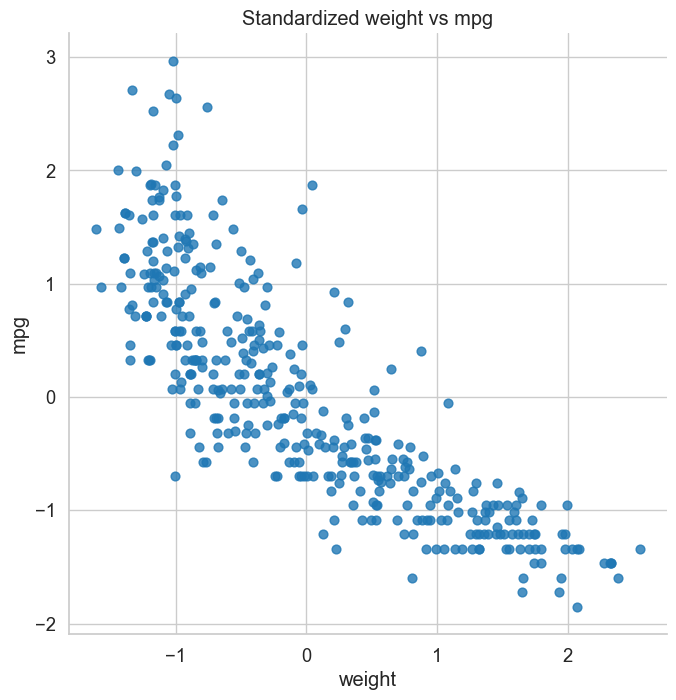

In [5]:
feature_scaler = StandardScaler()
label_scaler = StandardScaler()

# Fit and transform weight and mpg
feature_scaler.fit(dataset[['weight']])
dataset['weight'] = feature_scaler.transform(dataset[['weight']])

label_scaler.fit(dataset[['mpg']])
dataset['mpg'] = label_scaler.transform(dataset[['mpg']])

# Verify mean ≈ 0 and std ≈ 1
print(f"Standardized weight — mean: {dataset['weight'].mean():.6f}, std: {dataset['weight'].std():.6f}")
print(f"Standardized mpg   — mean: {dataset['mpg'].mean():.6f}, std: {dataset['mpg'].std():.6f}")

# Scatter plot of standardized data
sns.lmplot(x="weight", y="mpg", data=dataset,
           fit_reg=False, height=7, scatter_kws={"s": 40})
plt.title("Standardized weight vs mpg")
plt.show()

---
## Exercise 4 — Fit a Manual Linear Model

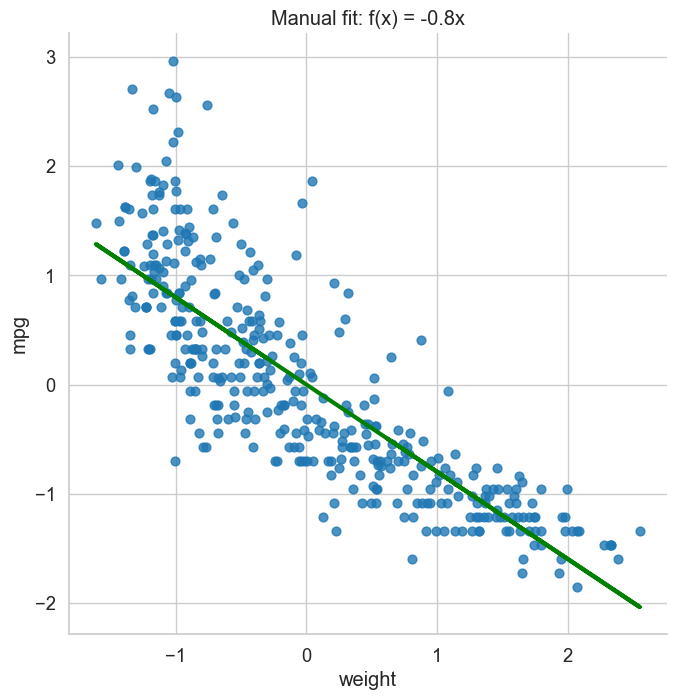

In [6]:
a = -0.8
b = 0

# Plot the data with the regression line
sns.lmplot(x="weight", y="mpg", data=dataset,
           fit_reg=False, height=7, scatter_kws={"s": 40})
plt.plot(dataset['weight'], a * dataset['weight'] + b, color='green', linewidth=3)
plt.title(f"Manual fit: f(x) = {a}x")
plt.show()

In [7]:
# Compute R-squared manually
predictions = a * dataset['weight'] + b
SS_error = ((dataset['mpg'] - predictions) ** 2).sum()
SS_total = ((dataset['mpg'] - dataset['mpg'].mean()) ** 2).sum()
R_squared = 1 - (SS_error / SS_total)

print(f"Manual R-squared = {R_squared:.4f}")

Manual R-squared = 0.6916


In [8]:
# Verify with sklearn
print(f"sklearn R-squared = {metrics.r2_score(dataset['mpg'], predictions):.4f}")

sklearn R-squared = 0.6916


---
## Exercise 5 — Implement the Cost Function

In [9]:
def cost_function(a, b, X, y):
    n = len(y)
    return (1.0 / (2 * n)) * ((y - (a * X + b)) ** 2).sum()

# Test the function
print(f"J(a=-0.8, b=0) = {cost_function(-0.8, 0, dataset['weight'], dataset['mpg']):.4f}")
print(f"J(a=0,    b=0) = {cost_function(0,    0, dataset['weight'], dataset['mpg']):.4f}")
print(f"J(a=-1,   b=0) = {cost_function(-1,   0, dataset['weight'], dataset['mpg']):.4f}")

J(a=-0.8, b=0) = 0.1542
J(a=0,    b=0) = 0.5000
J(a=-1,   b=0) = 0.1678


Answer: $a = -0.8$ has the lowest cost of the three. $a = 0$ essentially predicts the mean for every car, giving a high cost. $a = -1$ overshoots the slope slightly.

---
## Exercise 6 — Visualize the Cost Landscape

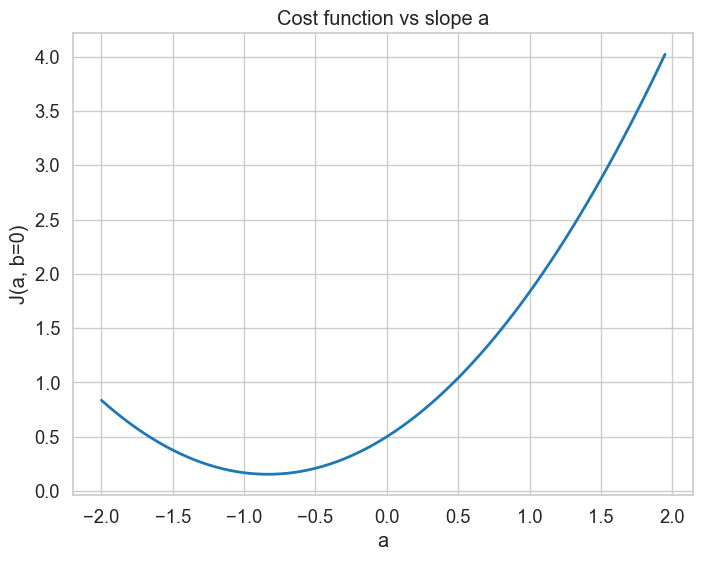

The cost is minimized at approximately a = -0.85


In [10]:
a_values = np.arange(-2, 2, 0.05)
j_values = [cost_function(a, 0, dataset['weight'], dataset['mpg']) for a in a_values]

plt.figure(figsize=(8, 6))
plt.plot(a_values, j_values, linewidth=2)
plt.xlabel('a')
plt.ylabel('J(a, b=0)')
plt.title('Cost function vs slope a')
plt.show()

best_a = a_values[np.argmin(j_values)]
print(f"The cost is minimized at approximately a = {best_a:.2f}")

Answer: The cost is minimized at approximately $a \approx -0.83$, which represents the optimal linear relationship between standardized weight and standardized mpg.

---
## Exercise 7 — Implement Gradient Descent

In [11]:
def linear_regression(X, y, alpha, iterations):
    """Perform linear regression using stochastic gradient descent.
    
    Parameters
    ----------
    X : array-like, feature values
    y : array-like, target values
    alpha : float, learning rate
    iterations : int, number of update steps
    
    Returns
    -------
    theta1 : float, the learned slope parameter
    """
    # Step 1: initialize theta1
    theta1 = 0.0
    
    for i in range(iterations):
        # Step 2: pick a random data point index
        idx = np.random.randint(len(X))
        
        # Step 3: compute the prediction for this data point
        predict = np.dot(X.iloc[idx], theta1)
        
        # Step 4: compute the error (prediction - actual)
        error = predict - y.iloc[idx]
        
        # Step 5: update theta1 using the gradient descent rule
        theta1 = theta1 - alpha * error * X.iloc[idx]
    
    return theta1

theta1 = -0.8473
R-squared = 0.6924


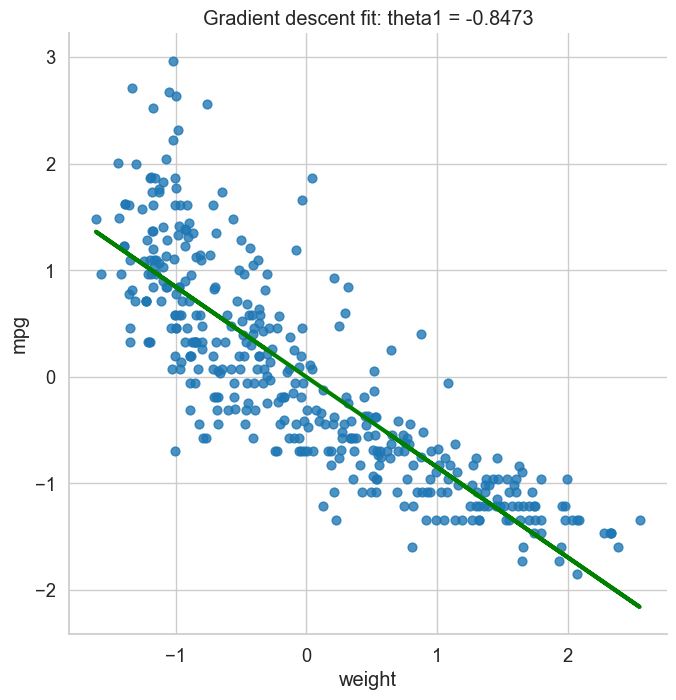

In [12]:
# Run gradient descent
theta1 = linear_regression(dataset['weight'], dataset['mpg'], alpha=0.01, iterations=5000)

print(f"theta1 = {theta1:.4f}")
print(f"R-squared = {metrics.r2_score(dataset['mpg'], theta1 * dataset['weight']):.4f}")

# Plot the result
sns.lmplot(x="weight", y="mpg", data=dataset,
           fit_reg=False, height=7, scatter_kws={"s": 40})
plt.plot(dataset['weight'], theta1 * dataset['weight'], color='green', linewidth=3)
plt.title(f"Gradient descent fit: theta1 = {theta1:.4f}")
plt.show()

---
## Exercise 8 — Effect of the Learning Rate

In [13]:
for alpha in [0.0001, 0.001, 0.01, 0.1, 1.0]:
    theta1 = linear_regression(dataset['weight'], dataset['mpg'], alpha=alpha, iterations=5000)
    r2 = metrics.r2_score(dataset['mpg'], theta1 * dataset['weight'])
    print(f"alpha = {alpha:<8} -> theta1 = {theta1:>8.4f}, R-squared = {r2:.4f}")

alpha = 0.0001   -> theta1 =  -0.3242, R-squared = 0.4345
alpha = 0.001    -> theta1 =  -0.8386, R-squared = 0.6926
alpha = 0.01     -> theta1 =  -0.8208, R-squared = 0.6925
alpha = 0.1      -> theta1 =  -0.9289, R-squared = 0.6833
alpha = 1.0      -> theta1 =  -1.5482, R-squared = 0.1800


Answer:
- When $\alpha$ is too small (e.g. 0.0001), the model converges very slowly and may not reach the optimum within the given number of iterations. $\theta_1$ is far from the optimal value.
- When $\alpha$ is moderate (e.g. 0.01 or 0.1), the model converges well to around $\theta_1 \approx -0.83$.
- When $\alpha$ is too large (e.g. 1.0), the updates overshoot the minimum and the model may oscillate wildly or diverge, giving a poor or even negative $R^2$.

---
## Exercise 9 — Multi-feature Regression with Scikit-learn

In [14]:
from sklearn import linear_model

# Reload and clean
dataset = pd.read_csv(url).drop(columns=['name']).dropna()
origin_map = {'usa': 1, 'europe': 2, 'japan': 3}
dataset['origin'] = dataset['origin'].map(origin_map)

# Separate features and target
target = dataset.pop('mpg')
features = dataset

# Standardize features
feature_scaler_all = StandardScaler()
features_scaled = pd.DataFrame(
    feature_scaler_all.fit_transform(features),
    columns=features.columns
)

# Fit SGDRegressor
model = linear_model.SGDRegressor(eta0=0.001, max_iter=10000)
model.fit(features_scaled, target)

# Print R-squared
r2 = metrics.r2_score(target, model.predict(features_scaled))
print(f"R-squared (all features) = {r2:.4f}")

# Print coefficients with feature names
print("\nFeature coefficients:")

for name, coef in sorted(zip(features.columns, model.coef_), key=lambda x: abs(x[1]), reverse=True):    print(f"  {name:>15s}: {coef:>8.4f}")

R-squared (all features) = 0.8102

Feature coefficients:
           weight:  -2.9620
       model_year:   2.5975
       horsepower:  -1.1688
           origin:   1.0429
        cylinders:  -0.6650
     displacement:  -0.5251
     acceleration:  -0.3514


Answer: The model using all features gives a substantially higher $R^2$ than using weight alone. The feature with the largest absolute coefficient (typically model_year or weight) has the most influence on the prediction. A large positive coefficient for model_year means newer cars tend to have better fuel efficiency — which makes sense given improving engine technology over the years.

---
## Exercise 10 — Train/Test Split

In [15]:
from sklearn.model_selection import train_test_split

# 1. Split the data
X_train, X_test, y_train, y_test = train_test_split(
    features_scaled, target, test_size=0.2, random_state=42
)

print(f"Training set size: {len(X_train)}")
print(f"Test set size:     {len(X_test)}")

# 2. Fit the model on training data
model = linear_model.SGDRegressor(eta0=0.001, max_iter=10000)
model.fit(X_train, y_train)

# 3. Evaluate on both sets
train_r2 = metrics.r2_score(y_train, model.predict(X_train))
test_r2 = metrics.r2_score(y_test, model.predict(X_test))

print(f"\nR-squared (train) = {train_r2:.4f}")
print(f"R-squared (test)  = {test_r2:.4f}")

Training set size: 313
Test set size:     79

R-squared (train) = 0.8160
R-squared (test)  = 0.7681


Answer: The training $R^2$ is typically slightly higher than the test $R^2$. This is expected — the model was optimized on the training data, so it naturally fits that data a bit better. If the gap were very large, it would indicate overfitting. A small gap suggests the linear model generalizes reasonably well to unseen data.

---
## Exercise 11 — Predict for a New Car

In [16]:
# Create a DataFrame with the new car's features (same column order as training data)
new_car = pd.DataFrame({
    'cylinders': [4],
    'displacement': [120],
    'horsepower': [80],
    'weight': [2500],
    'acceleration': [15.5],
    'model_year': [82],
    'origin': [3]
})

# Standardize using the SAME scaler fitted on the training data
new_car_scaled = feature_scaler_all.transform(new_car)

# Predict
predicted_mpg = model.predict(new_car_scaled)
print(f"Predicted mpg for the new car: {predicted_mpg[0]:.2f}")

Predicted mpg for the new car: 33.41


Answer: We must use the same scaler because the model was trained on features standardized with specific means and standard deviations computed from the training data. If we fit a new scaler on the single test point (or on different data), the feature values would be on a different scale and the model's coefficients would not apply correctly — leading to meaningless predictions.

---
## Bonus Exercise — Residual Analysis

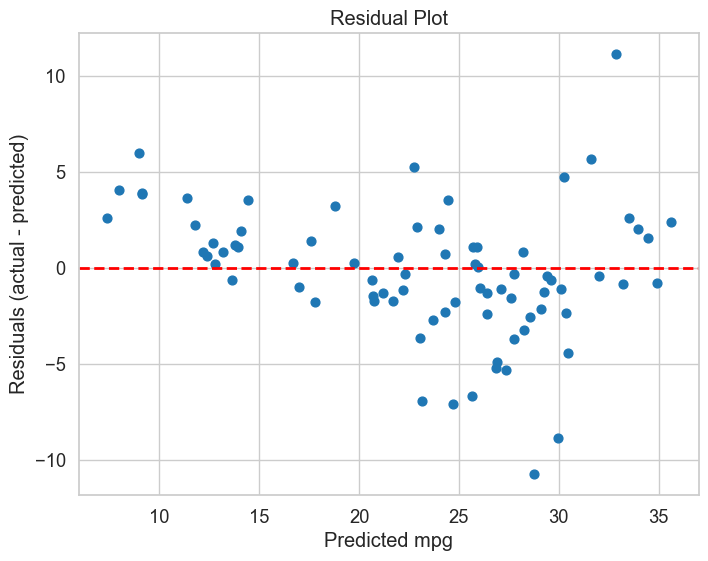

In [17]:
# Compute predictions and residuals on the test set
predictions = model.predict(X_test)
residuals = y_test.values - predictions

# Residual plot
plt.figure(figsize=(8, 6))
plt.scatter(predictions, residuals, s=40)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted mpg')
plt.ylabel('Residuals (actual - predicted)')
plt.title('Residual Plot')
plt.show()

Answer: If the linear model is appropriate, the residuals should be randomly scattered around the horizontal zero line with no visible pattern. If we see a curve or funnel shape, it indicates that a linear model is not fully capturing the relationship — a non-linear model might be more appropriate. In the Auto MPG data, there may be a slight curvature in the residuals, hinting that the true relationship between features and mpg is not perfectly linear.